# Inaugural Project

Imports and set magics:

In [21]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import inauguralproject as ip

# Question 1

**Explain how you solve the model**

In [13]:
def utility(z, theta):
    #u = (z**(1+theta))/(1+theta)
    #return u

def exp_utility(q, x, y, p):
    #
    #z1 = y-x+q-p*q
    #z2 = y-p*q
    #return p*utility(z1, theta) + (1-p)*utility(z2, theta)

In [27]:
x = 0.6
y = 1
p = 0.2
theta = -2

def q_optimize(x, y, p):
    obj = lambda q: -exp_utility(q, x, y, p)
    res = optimize.minimize_scalar(obj, bounds=(0, 1), method='bounded')
    return res.x
    
# grid for xs
xs = np.linspace(0.01, 0.9, 100)

# grid for qstar
qstar = np.zeros(100)

# loop
for i, x in enumerate(xs):
    qstar[i] = q_optimize(x, y, p)

Text(0.5, 1.0, 'Optimal insurance coverage, $q^*$')

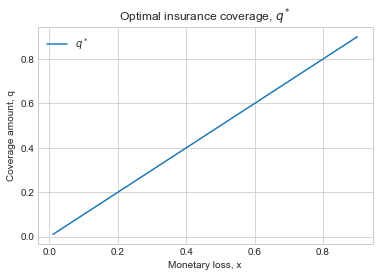

In [28]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(xs, qstar,'-', label='$q^*$')
ax.legend(loc='upper left')
ax.set_xlabel('Monetary loss, x')
ax.set_ylabel('Coverage amount, q')
ax.set_title('Optimal insurance coverage, $q^*$')

# Question 2

Explain your code and procedure

In [18]:
x = 0.6
y = 1
p = 0.2
theta = -2

def V_pi(pi, q, x, y, p):
    return p*utility(y-x+q-pi, theta) + (1-p)*utility(y-pi, theta)

V0 = V_pi(0, 0, x, y, p)

In [19]:
def optimal_pi(q, x, y, p, V0):
    # objective function
    def obj(pi):
        return V_pi(pi, q, x, y, p) - V0
    # optimize
    res = optimize.root(obj, 0.1)
    return res.x

# grid for qs between 0.01 and 0.6
qs = np.linspace(0.01, 0.6, 100)

# grid for pi calculations
pis = np.zeros(100)
pi_norm = p*qs
# loop
for i, q in enumerate(qs):
    pis[i] = optimal_pi(q, x, y, p, V0)

Text(0.5, 1.0, 'Set of feasible premiums for a given $q$')

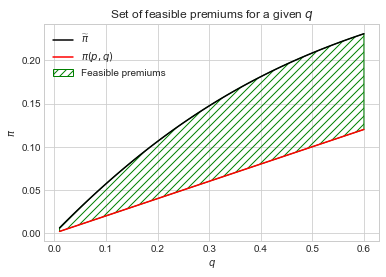

In [20]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(qs, pis,'-', color='black', label='$\widetilde{\pi}$')
ax.plot(qs, pi_norm, '-', color='red', label='$\pi (p,q)$')
ax.fill_between(qs, pis, pi_norm, color='none', hatch='///', edgecolor='g', label='Feasible premiums')
ax.legend(loc='upper left')
ax.set_xlabel('$q$')
ax.set_ylabel('$\pi$')
ax.set_title('Set of feasible premiums for a given $q$')

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.